# Analysis Visulazation
Visulize The results of the analysis

In [37]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

pd.set_option('display.max_columns', 500)

#These are binary labels orginally used in the labelling process. Independent of the cohice of binary or tinery labels used for calsification.
binary_labels = ['pro RSF', 'anti RSF', 'anti SAF', 'pro SAF', 'pro peace', 'anti peace', 'pro war', 'anti war', 'pro civilian', 'anti civilians',
                 'no polarisation', 'Geopolticis', 'Sudanese', 'Not Sudanese', 'Likely not a bot', 'Not about Sudan']

#Load the classified data
data = pd.read_parquet('../data/combined_reports_with_preds_final.parquet')

data_copy = data.copy() #Copy of the data to be used for filtering
    

#Filter out the data that is not about Sudan
data = data[data['Not about Sudan'] == 0]

#Plot the binary labels Precentage of the total number of tweets
data = data[binary_labels]
data = data.sum()
data_precentage = data / data.sum()
data = pd.DataFrame({'Label':data.index, 'Count':data.values, 'Percentage':data_precentage.values})
data['Percentage'] = data['Percentage'].apply(lambda x: f'{x:.2%}')
data = data.sort_values('Count', ascending=False)
fig = px.bar(data, x='Label', y='Count', text='Percentage')
fig.update_layout(title='Labels Counts Precntage of All Tweets', xaxis_title='Label', yaxis_title='Count')
fig.show()

#save the plot
fig.write_html('../plots/labels_counts_percentage.html')


In [38]:
data = data_copy.copy()
# Plot the binary labels counts per month
data = data[data['Not about Sudan'] == 0]
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
months = data['month'].unique()
#Replace the month number with the month name
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = data['month'].apply(lambda x: month_names[x-1])

months = sorted(months)
data_per_month = data.groupby('month')[binary_labels].sum()
data_per_month = data_per_month / data_per_month.sum()
data_per_month = data_per_month.reset_index()
data_per_month = pd.melt(data_per_month, id_vars='month', value_vars=binary_labels, var_name='Label', value_name='Percentage')
fig = px.bar(data_per_month, x='month', y='Percentage', color='Label', barmode='group')
fig.update_layout(title='Binary Labels Counts per Month', xaxis_title='Month', yaxis_title='Percentage')
fig.show()

#save the plot
fig.write_html('../plots/binary_labels_counts_per_month.html')


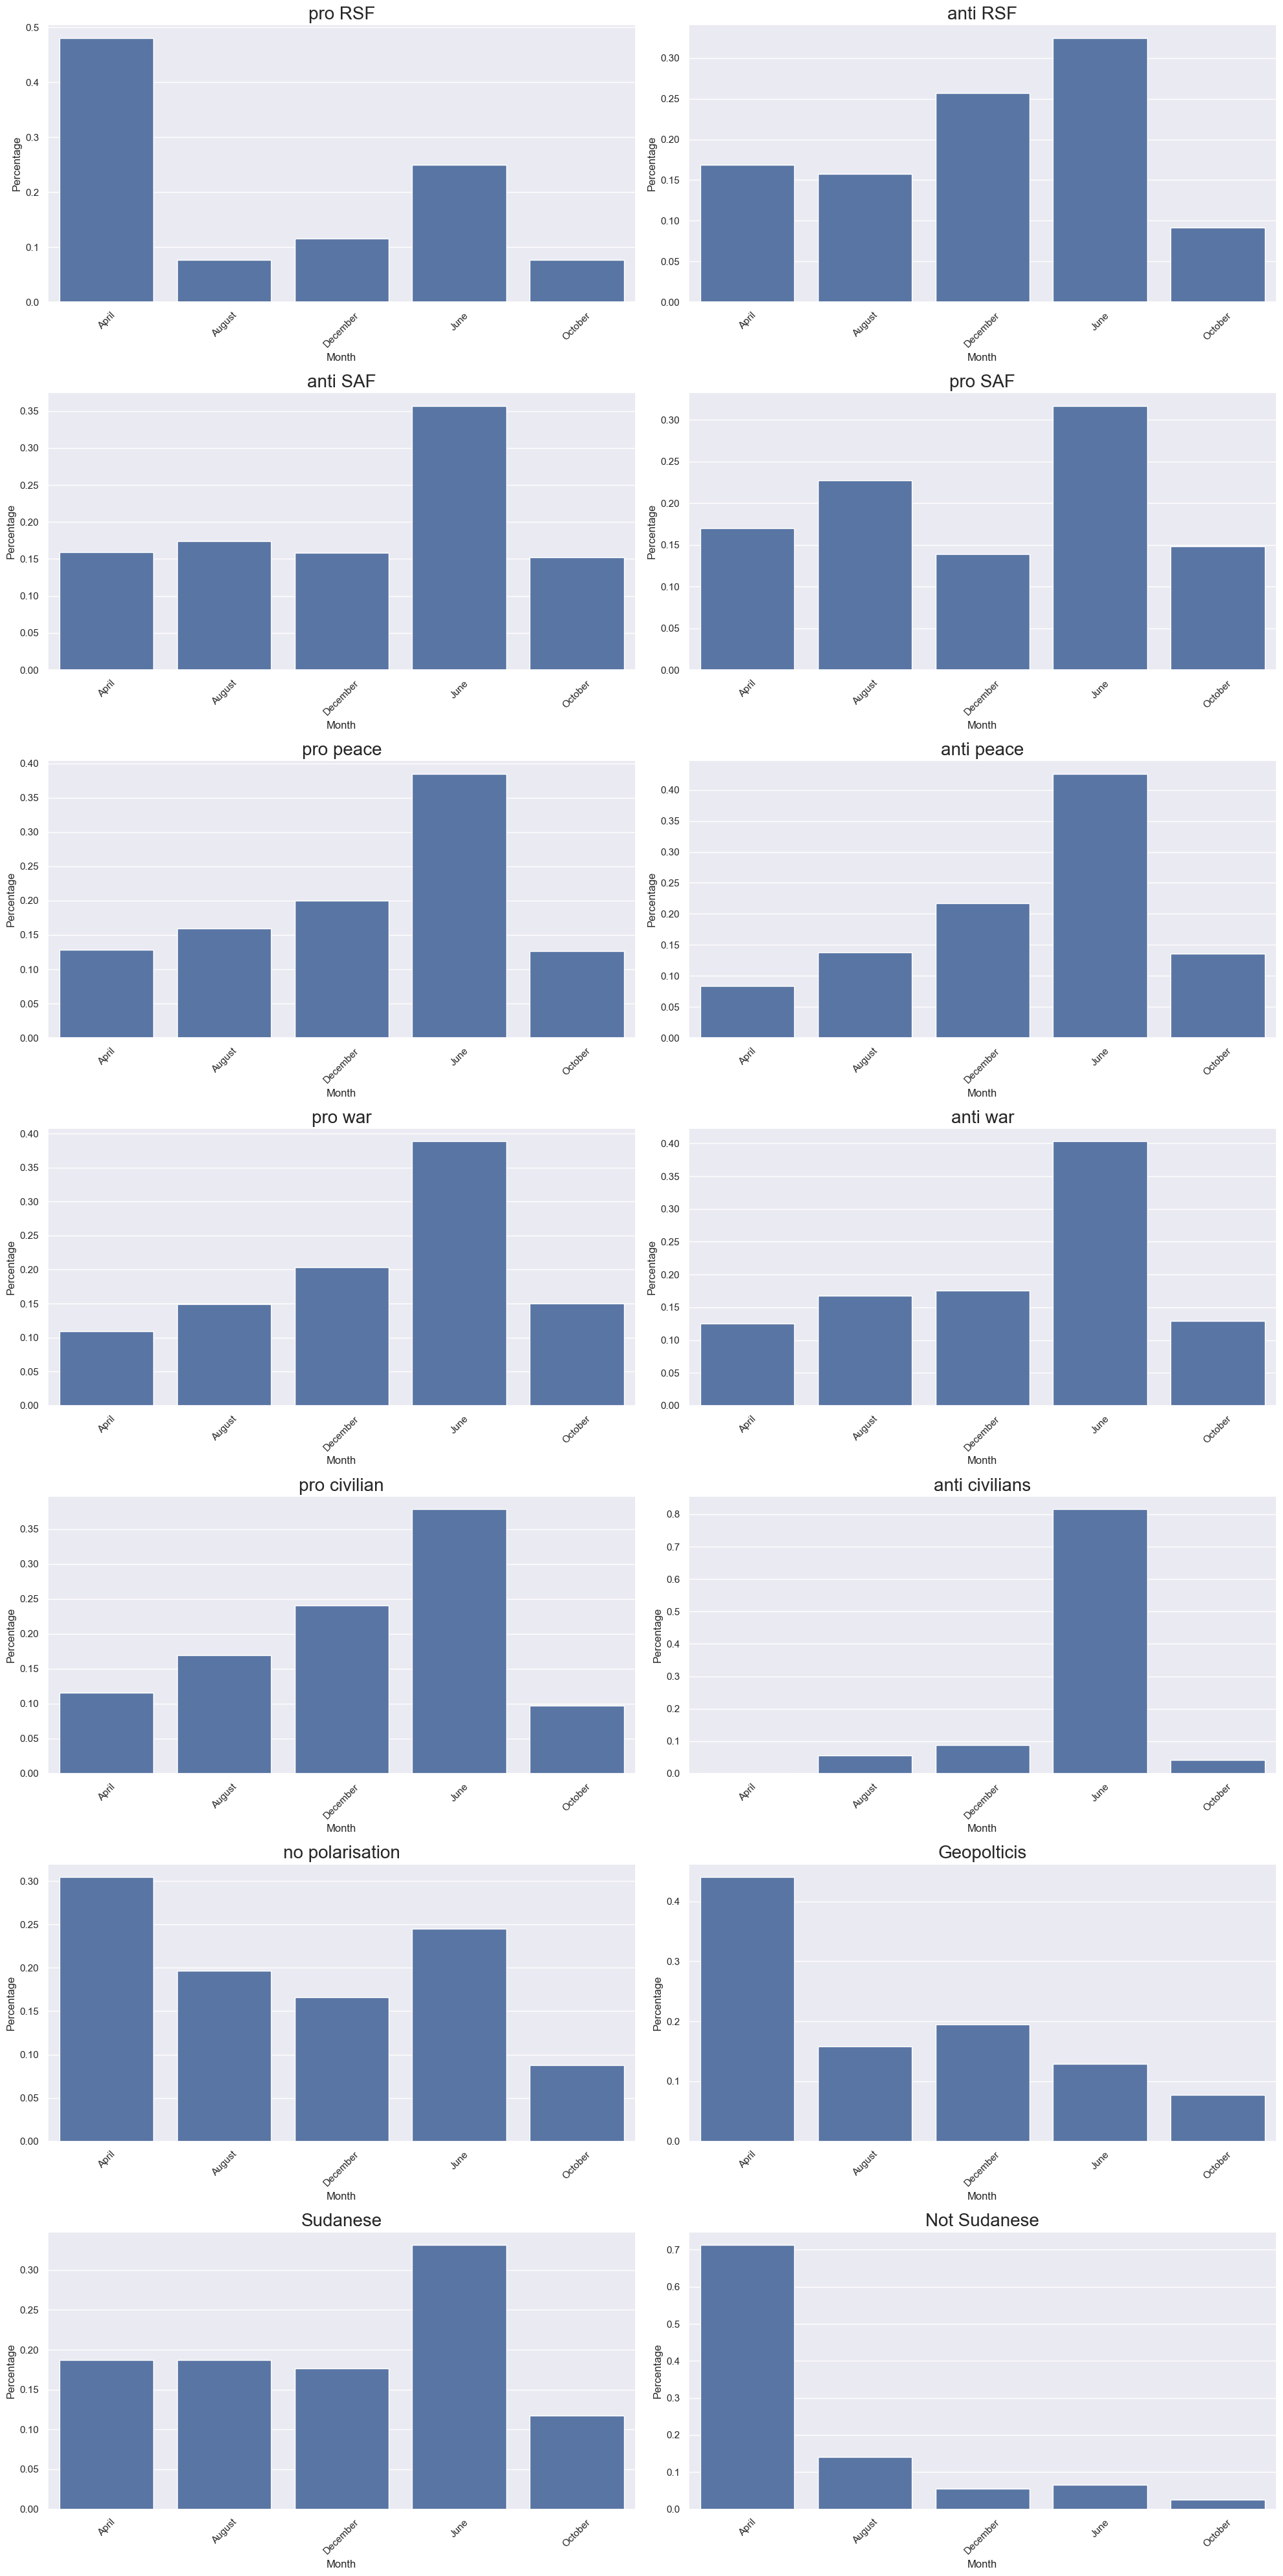

In [39]:
num_labels = len(binary_labels) - 2 # 14 labels after Excluding the 'Not about Sudan' and 'Likely not a bot' labels
data = data_copy.copy()
data = data[data['Not about Sudan'] == 0]
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
months = data['month'].unique()
#Replace the month number with the month name
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = data['month'].apply(lambda x: month_names[x-1])
months = sorted(months)
data_per_month = data.groupby('month')[binary_labels].sum()
data_per_month = data_per_month / data_per_month.sum()
data_per_month = data_per_month.reset_index()
data_per_month = pd.melt(data_per_month, id_vars='month', value_vars=binary_labels, var_name='Label', value_name='Percentage')

fig, axs = plt.subplots(7, 2, figsize=(20, 40))
axs = axs.ravel()
for i, label in enumerate(binary_labels):
    if label in ['Likely not a bot', 'Not about Sudan']:
        continue
    sns.barplot(data=data_per_month[data_per_month['Label'] == label], x='month', y='Percentage', ax=axs[i])
    axs[i].set_title(label, fontsize=20)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Percentage')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

#save the plot
fig.savefig('../plots/binary_labels_counts_per_month_seaborn.png')


In [41]:
from directory_tree import display_tree
display_tree('../')

../
├── data/
│   ├── cleaned_data.csv
│   ├── combined_reports_with_preds_final.parquet
│   └── data.xlsx
├── embeddings/
│   └── labelled_embeddings.parquet
├── LICENSE
├── logs/
│   └── stratified_logs.pth
├── models/
│   ├── best_clf_anti peace_split_0.pth
│   ├── best_clf_anti peace_split_1.pth
│   ├── best_clf_anti peace_split_2.pth
│   ├── best_clf_anti peace_split_3.pth
│   ├── best_clf_anti peace_split_4.pth
│   ├── best_clf_Pro peace,_split_0.pth
│   ├── best_clf_Pro peace,_split_1.pth
│   ├── best_clf_Pro peace,_split_2.pth
│   ├── best_clf_Pro peace,_split_3.pth
│   ├── best_clf_Pro peace,_split_4.pth
│   ├── best_clf_RSF_split_0.pth
│   ├── best_clf_RSF_split_1.pth
│   ├── best_clf_RSF_split_2.pth
│   ├── best_clf_RSF_split_3.pth
│   ├── best_clf_RSF_split_4.pth
│   ├── best_clf_SAF_split_0.pth
│   ├── best_clf_SAF_split_1.pth
│   ├── best_clf_SAF_split_2.pth
│   ├── best_clf_SAF_split_3.pth
│   ├── best_clf_SAF_split_4.pth
│   ├── clf_anti peace.pth
│   ├── clf_Pro peace,